# Applied Stochastic Processes: Mini Assignment III

## Part I - Theory
Patients arrive in a hospital unit according to a Poisson process with a rate of 1 client every 48 hours.
The time needed for the patients to be treated and dismissed is exponentially distributed with a mean of 72 hours,
independently of the other patients. The hospital unit can accommodate a maximum of 4 patients.
When the unit is full (i.e., when 4 patients are already being treated), new patients are turned to other hospitals.


## Question 1
Consider a hospital unit where patients arrive according to a Poisson process with a rate $\lambda = \frac{1}{48}$ per hour (since patients arrive every 48 hours). The service times for the patients are exponentially distributed with a mean of 72 hours, which corresponds to a service rate of $\mu = \frac{1}{72}$ per hour.

### State Space 
The state space $S$ of the CTMC, defined as the number of patients in the hospital unit, is given by:
$$ S = \{0, 1, 2, 3, 4\} $$
where the state $i$ represents that there are $i$ patients currently in the hospital unit.

### Transition Rates
The transitions of this CTMC can occur due to the arrival of a new patient or the service completion and discharge of a current patient. The transition rates are defined as follows:

- From state $i$ to $i+1$ (arrival of a new patient), the rate is $\lambda$ for $i = 0, 1, 2, 3$. No arrivals are possible at state 4 due to the unit capacity limit.
- From state $i$ to $i-1$ (departure of a patient), the rate is $i \mu$ for $i = 1, 2, 3, 4$. There are no departures from state 0.


### Transition Probability Matrix
The transition probability to go from state i to state j are:

$$
P_{ij} = 
\begin{cases}
\frac{\lambda_i}{\lambda_i + \mu_i} & \text{if } j = i + 1 \\
\frac{\mu_i}{\lambda_i + \mu_i} & \text{if } j = i - 1 \\
0 & \text{otherwise}
\end{cases}
$$



## Question 2

The system described indeed behaves as a birth and death process. A birth and death process is characterized by states where transitions between state $i$ and state $i+1$ represent births (arrivals) and transitions between state $i$ and state $i-1$ represent deaths (departures). Here’s how the process fits this model:

- Birth Rates (Arrivals): The arrival of patients to the hospital unit follows a Poisson process, which fits the birth characteristic of the process:
  - For states $i = 0, 1, 2, 3$, the arrival rate is $\lambda = \frac{1}{48} \text{ per hour}$.
  - At state $4$, the unit reaches its capacity, and no further arrivals can increase the state, which sets the birth rate from state $4$ as $\lambda_4 = 0$.

- Death Rates (Departures): Patients are treated and discharged independently, following an exponential distribution, which fits the death characteristic:
  - From state $i$, the departure rate is $\mu$ where $\mu = \frac{1}{72} \text{ per hour}$
  - The departure rate from state $0$ $\mu_0$ is $0$ since there are no patients to discharge.

## Question 3

To determine the long-run proportion of time the hospital unit is empty, we analyze the steady-state probabilities of the CTMC. The hospital unit is empty when it is in state $0$. 

To find this proportion, we set up the balance equations based on the birth and death rates specified:

- The rate out of state $0$ (birth rate) is $\lambda = \frac{1}{48}$.
- There is no rate into state $0$ since it is the lowest state (no deaths into state $0$).

The balance equation for state $0$ is given by:
$$
\pi_0 \lambda_0 = \pi_1 \mu_1
$$
where $\pi_0$ is the steady-state probability of the unit being empty and $\pi_1$ is the steady-state probability of having one patient. 

For a birth and death process, the general form of the steady-state distribution $\pi_i$ can be calculated recursively from the balance equations as:
$$
\pi_i = \pi_0 \prod_{k=1}^i \frac{\lambda_{k-1}}{\mu_k}
$$
where $\lambda_{k-1}$ is the arrival rate to state $k-1$ and $\mu_k = \mu * k$ is the departure rate from state $k$. Specifically, for state $1$, this becomes:
$$
\pi_1 = \pi_0 \frac{\lambda_0}{\mu_1} = \pi_0 \frac{\frac{1}{48}}{\frac{1}{72}} = \pi_0 \frac{72}{48} = \pi_0 \frac{3}{2}
$$

Solving for $\pi_0$ yields:
$$
\pi_0 = \frac{1}{1 + \frac{3}{2} + \frac{9}{8} + \frac{9}{16} + \frac{27}{128}} = 0.2274
$$

The denominator sums the geometric series representing the weighted sum of staying probabilities in each state, from $0$ up to $4$, with the weights determined by the ratio of birth to death rates.

Thus, $\pi_0$ gives us the long-run proportion of time that the hospital unit is empty.


## Question 4

To determine the long-run average number of patients in the hospital unit, we use the steady-state probabilities of each state within the system. The average number of patients, denoted as $E[X]$, is computed as the sum of the products of each state and its corresponding steady-state probability:

$$
E[X] = \sum_{i=0}^4 i \pi_i
$$

Where:
- $i$ represents the number of patients (state).
- $\pi_i$ represents the steady-state probability of having $i$ patients.

Assuming the steady-state probabilities have been calculated or derived from the balance equations as shown in Question 3, we can express $E[X]$ in terms of these probabilities:

$$
E[X] = 0 \cdot \pi_0 + 1 \cdot \pi_1 + 2 \cdot \pi_2 + 3 \cdot \pi_3 + 4 \cdot \pi_4 = 1.4283
$$

Where:
- $\pi_0$ is the steady-state probability of the unit being empty.
- $\pi_1, \pi_2, \pi_3, \pi_4$ are the probabilities of having 1, 2, 3, and 4 patients, respectively:

$$
\pi_1 = \pi_0 * \frac{3}{2} = 0.3410
$$
$$
\pi_2 = \pi_1 * \frac{9}{8} = 0.2558
$$
$$
\pi_3 = \pi_2 * \frac{9}{16} = 0.1279
$$
$$
\pi_4 = \pi_3 * \frac{27}{128} = 0.0480
$$



## Question 5

The steady state probability $\pi_4$ effectively represents the proportion of time the hospital unit is full and consequently the proportion of arriving patients who must be turned away because there is no free capacity. Since new patients arrive at a constant rate and the process is memoryless, the fraction of time the system is in state $4$ directly translates to the fraction of total arriving patients that are turned away.

$$
\text{Proportion Turned Away} = \pi_4 = 0.048
$$


## Part II - Simulation
Assuming analytical solutions from Part I are difficult or tedious to find, simulate the process instead to estimate the desired metrics.


## Question 1

In [7]:
import numpy as np

# Parameters
lambda_arrival = 1/48  # Arrival rate per hour
mu_service = 1/72      # Service rate per hour
N = 100                # Number of jumps to simulate
max_patients = 4       # Maximum number of patients the unit can accommodate

# State initialization
current_state = 0
states = [current_state]  # To keep track of states
jump_times = [0]          # To record times at each jump
inter_arrival_times = []  # To store inter-arrival times
# Simulation
for i in range(1, N):
    
    arrival_time = np.random.exponential(1/lambda_arrival)
    
    if current_state > 0:
        # There are patients to be serviced
        service_time = np.random.exponential(1/(mu_service * current_state))
    else:
        # No patients to service
        service_time = np.inf  # Infinite time until next service (no services)


    # Find next event time
    if arrival_time < service_time:
        if current_state < max_patients:
            next_time = arrival_time
            current_state += 1  # New patient arrives
            event_type = 'arrival'
        else:
            next_time = arrival_time
            # We don't increase the current state as we are at full capacity
            event_type = 'arrival'
    else:
        next_time = service_time
        current_state -= 1  # A patient is serviced and leaves
        event_type = 'departure'

    # Record the results even is the state remains at 4
    jump_times.append(jump_times[-1] + next_time)
    states.append(current_state)
    if event_type == 'arrival':
        inter_arrival_times.append(next_time)

# Display results
print("Jump times:", jump_times)
print("States at each jump:", states)
print("Inter-arrival times:", inter_arrival_times)

Jump times: [0, 137.68639463796904, 153.302597559367, 157.32399645135757, 185.43233001832095, 228.07144273017678, 268.2003127915917, 293.68753801279587, 324.90228402508353, 325.49445027562615, 325.5554704479495, 333.53448295083507, 366.38077763964884, 386.6232689961202, 398.42988078372525, 415.78053203019596, 440.3724705969103, 445.28093875393546, 470.3595785088083, 499.7869478005907, 537.7538536076834, 548.4425035232557, 556.4546205709969, 560.2632707006952, 579.7450614585472, 593.0769952750526, 599.176984589117, 635.3498204473059, 643.1067089143403, 661.8451514635046, 701.0914171608722, 709.9221798914376, 774.8590266198045, 878.4650430745569, 957.56381470883, 968.0313932998748, 1039.9474694597257, 1053.3757154396756, 1054.0578394861222, 1067.2630183150443, 1110.8826682847418, 1117.7701682058303, 1137.9298768857454, 1167.3067226866158, 1184.203221689604, 1221.6436345456302, 1224.2002617207133, 1273.1385776108245, 1285.725804242268, 1326.0164909590353, 1388.055617416761, 1426.709345576

## Question 2

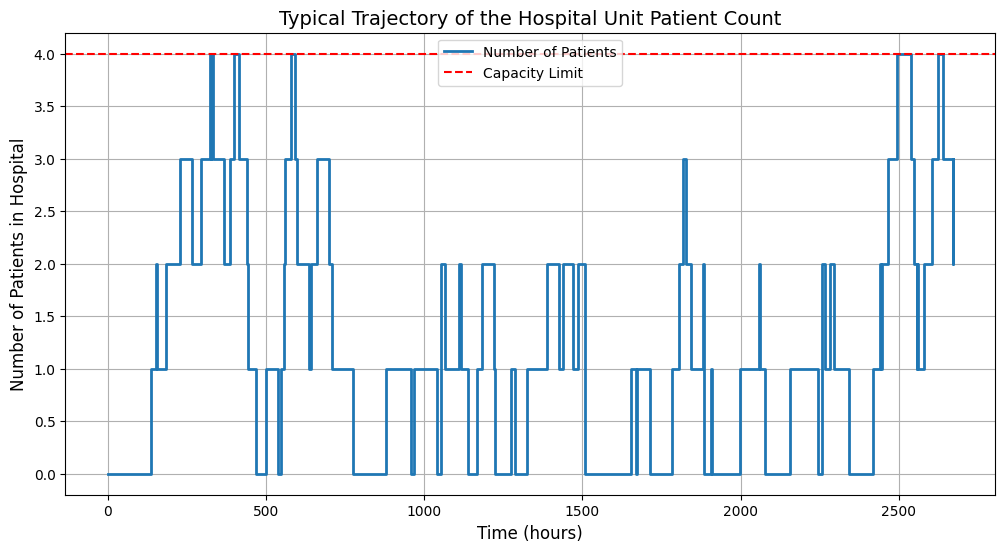

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.step(jump_times, states, where='post', label='Number of Patients', linewidth=2)
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Number of Patients in Hospital', fontsize=12)
plt.title('Typical Trajectory of the Hospital Unit Patient Count', fontsize=14)
plt.grid(True)
plt.axhline(y=max_patients, color='r', linestyle='--', label='Capacity Limit')
plt.legend()
plt.show()


## Question 3


In [3]:
# Re-run with higher N
N = 1000000

# State initialization
current_state = 0
states = [current_state]  # To keep track of states
jump_times = [0]          # To record times at each jump
inter_arrival_times = []  # To store inter-arrival times
# Simulation
for i in range(1, N):
    
    arrival_time = np.random.exponential(1/lambda_arrival)
    
    if current_state > 0:
        # There are patients to be serviced
        service_time = np.random.exponential(1/(mu_service * current_state))
    else:
        # No patients to service
        service_time = np.inf  # Infinite time until next service (no services)


    # Find next event time
    if arrival_time < service_time:
        if current_state < max_patients:
            next_time = arrival_time
            current_state += 1  # New patient arrives
            event_type = 'arrival'
        else:
            next_time = arrival_time
            # We don't increase the current state as we are at full capacity
            event_type = 'arrival'
    else:
        next_time = service_time
        current_state -= 1  # A patient is serviced and leaves
        event_type = 'departure'

    # Record the results even is the state remains at 4
    jump_times.append(jump_times[-1] + next_time)
    states.append(current_state)
    if event_type == 'arrival':
        inter_arrival_times.append(next_time)

In [4]:
# Calculate the proportion of time the hospital unit is empty
empty_times = [jump_times[i+1] - jump_times[i] for i in range(len(jump_times)-1) if states[i] == 0]
total_time = jump_times[-1] - jump_times[0]
proportion_empty = sum(empty_times) / total_time

# Print the proportion of time the unit is empty
print(f"Proportion of time the hospital unit is empty: {proportion_empty:.4f}")

# Compare with theoretical value from Part I, Question 3 
theoretical_empty = 0.2274
print(f"Theoretical proportion of time the hospital unit is empty: {theoretical_empty:.4f}")
print(f"Difference between simulated and theoretical proportions: {abs(proportion_empty - theoretical_empty):.4f}")

Proportion of time the hospital unit is empty: 0.2285
Theoretical proportion of time the hospital unit is empty: 0.2274
Difference between simulated and theoretical proportions: 0.0011


## Question 4


In [5]:
# Calculate the average number of patients using the time-weighted average method
weighted_patient_counts = [(jump_times[i+1] - jump_times[i]) * states[i] for i in range(len(jump_times)-1)]
total_time = jump_times[-1] - jump_times[0]
average_patients = sum(weighted_patient_counts) / total_time

# Print the estimated average number of patients
print(f"Estimated average number of patients in the hospital unit: {average_patients:.4f}")

# Compare with theoretical value from Part I, Question 4 
theoretical_average = 1.4283  
print(f"Theoretical average number of patients in the hospital unit: {theoretical_average:.4f}")
print(f"Difference between simulated and theoretical averages: {abs(average_patients - theoretical_average):.4f}")

Estimated average number of patients in the hospital unit: 1.4250
Theoretical average number of patients in the hospital unit: 1.4283
Difference between simulated and theoretical averages: 0.0033


## Question 5

In [6]:
# Calculate the number of turned away patients
turned_away_count = sum(1 for i in range(len(states)-1) if states[i] == max_patients and states[i+1] == max_patients)

# Calculate the total number of arrival attempts
total_arrivals = len([time for time in inter_arrival_times])

# Calculate the proportion of turned away patients
proportion_turned_away = turned_away_count / total_arrivals

# Print the estimated proportion of turned away patients
print(f"Estimated proportion of patients turned away: {proportion_turned_away:.4f}")

# Compare with theoretical value from Part I, Question 5
theoretical_turned_away = 0.0480  
print(f"Theoretical proportion of patients turned away: {theoretical_turned_away:.4f}")
print(f"Difference between simulated and theoretical proportions: {abs(proportion_turned_away - theoretical_turned_away):.4f}")

Estimated proportion of patients turned away: 0.0482
Theoretical proportion of patients turned away: 0.0480
Difference between simulated and theoretical proportions: 0.0002
